<a href="https://colab.research.google.com/github/laway/tensorflow/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensor Flow

There are many definitions for a regression problem but in our case we're going to simplify it: prediction a numerical variable based on some other combination of variables, even shorteer: predicting a number

In [1]:
import tensorflow as tf
print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.14.0


## Creating some data to view and fit

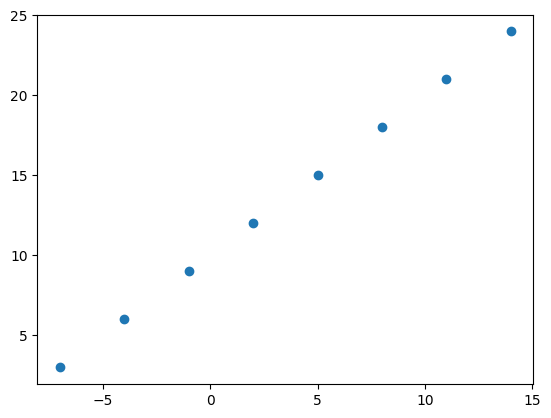

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [5]:
X[0].ndim

0

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our NumPy array into tensors with type float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

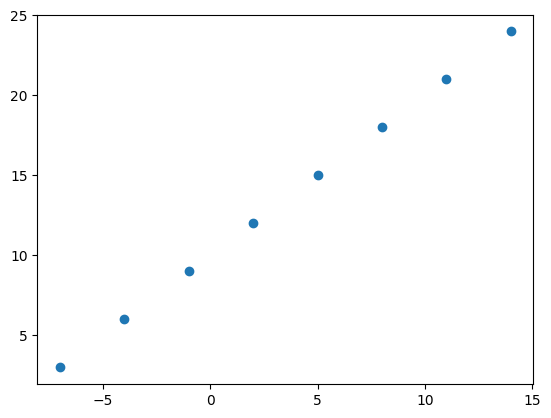

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1.   **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2.   **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [10]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradial descent
              metrics = ["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 10.5306 - mae: 10.5306
Epoch 2/5
1/1 [==============================] - 0s 41ms/step - loss: 10.3981 - mae: 10.3981
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 10.2656 - mae: 10.2656
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 10.1331 - mae: 10.1331
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 10.0006 - mae: 10.0006


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 295ms/step


array([[17.447943]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimization function or, perhaps, the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on mode data (give the model more examples to learn from)

In [13]:
# let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting a model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.4077 - mae: 14.4077
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 14.2752 - mae: 14.2752
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 14.1427 - mae: 14.1427
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0102 - mae: 14.0102
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.8777 - mae: 13.8777
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 13.7452 - mae: 13.7452
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 13.6127 - mae: 13.6127
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 13.4802 - mae: 13.4802
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 13.3477 - mae: 13.3477
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2152 - mae: 13.2152
Epoch 11/100
1/1 [==============================] -

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 142ms/step


array([[29.80097]], dtype=float32)

In [16]:
# recreating once again (with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.3637 - mae: 13.3637
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6090 - mae: 12.6090
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8532 - mae: 11.8532
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0936 - mae: 11.0936
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.3291 - mae: 10.3291
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5587 - mae: 9.5587
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7811 - mae: 8.7811
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.9942 - mae: 7.9942
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1957 - mae: 7.1957
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7657 - mae: 6.7657
Epoch 11/100
1/1 [==============================] - 0s 12ms/s

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 131ms/step


array([[26.873804]], dtype=float32)

## Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation there are 3 workds you should memorize:

> "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of the model line up against the ground truth?

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the bigger dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

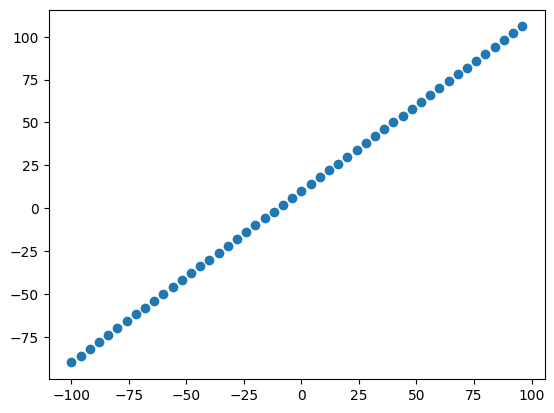

In [20]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this model, typicall 70-80% of the total data have available.
* **Validation set** - the model gets tuned using this set, which is typicall 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned. This set is typically 10-15% of the total data available



In [21]:
# Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] #first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10  are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and t est sets... Let's visualize it again!

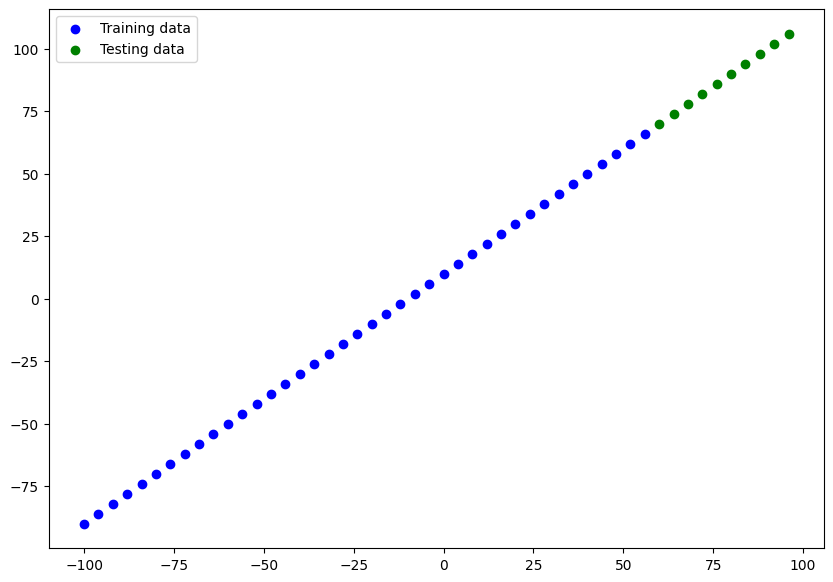

In [23]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
#show a legend
plt.legend()

In [24]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

### Visualizing the model

In [25]:
# Let's create a model which builds automaticall by definining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model01_2")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.summary()



Model: "model01_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters are not updated during training. This is typical when you bring in already learned patterns or parameters from other models during transfer learning

**Resource:** For a mode in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video: http://introtodeeplearning.com

In [26]:
# Fit the mode
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [27]:
# Get a summary of our model
model.summary()

Model: "model01_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


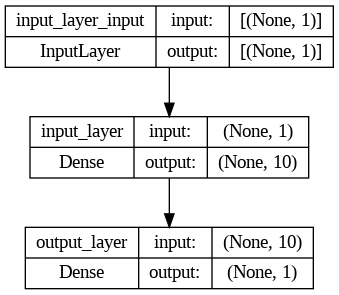

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions)

In [29]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 42ms/step


array([[ 69.58239 ],
       [ 74.10774 ],
       [ 78.633095],
       [ 83.15844 ],
       [ 87.683784],
       [ 92.20913 ],
       [ 96.73449 ],
       [101.259834],
       [105.78517 ],
       [110.31052 ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to re-use some kind of functionality in the future it is a good idea to turn it into a function

In [31]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to the ground truth labels
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend()

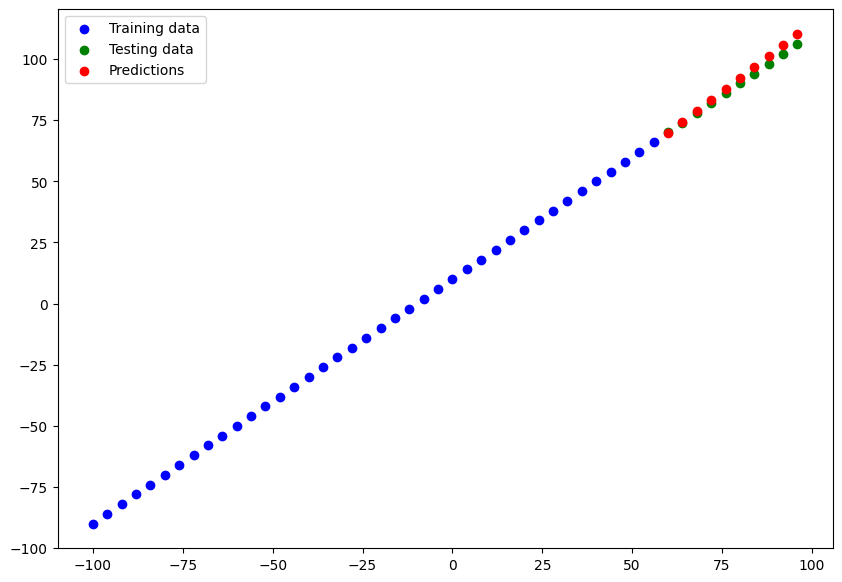

In [32]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the avarage errors"

In [33]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 185ms/step - loss: 2.0300 - mae: 2.0300


[2.0299811363220215, 2.0299811363220215]

In [34]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0299811>

In [35]:
# Calculate the mean square error
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=6.065621>

In [36]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

In [37]:
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

In [38]:
mae(y_test, tf.squeeze(y_pred)), mse(y_test, tf.squeeze(y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0299811>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.065621>)

### Running experiments to improve our model

```
Build model -> fit it -> evaluate it -> tweak it ->...
```

1. Get more data - get more example for the model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come if the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for a 100 epochs
2. `model_2` - 2 layers, trained for a 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4.
5.

In [39]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`**

In [40]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 58.3964 - mae: 58.3964
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 23.8540 - mae: 23.8540
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3391 - mae: 10.3391
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.7574 - mae: 12.7574
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8020 - mae: 11.8020
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9207 - mae: 10.9207
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6958 - mae: 8.6958
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.7578 - mae: 7.7578
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.9233 - mae: 19.9233
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.7430 - mae: 13.7430
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

1/1 [==============================] - 0s 54ms/step


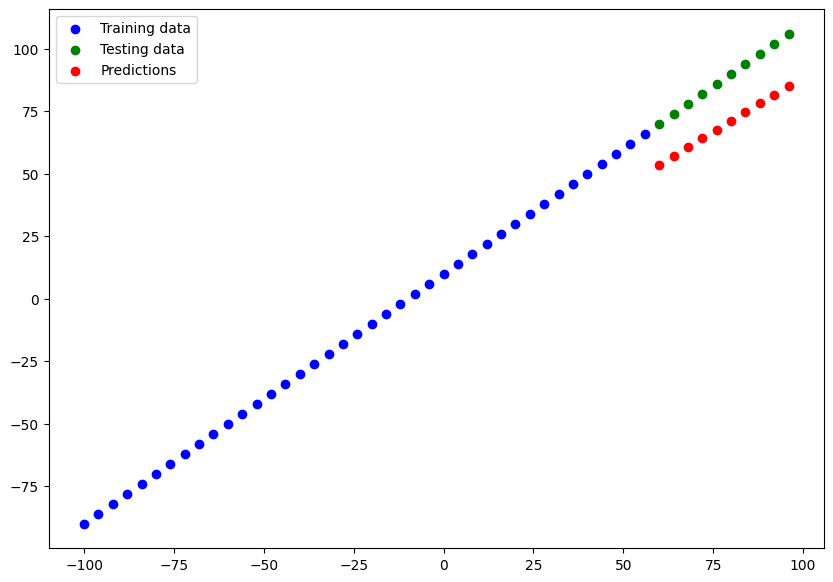

In [41]:
# Make and plot predictions for `model_1`
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [42]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.575134>,
 <tf.Tensor: shape=(), dtype=float32, numpy=347.14413>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [43]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name = "Hidden"),
    tf.keras.layers.Dense(1, name = "Output_layer")
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 60.2225 - mse: 5698.3330
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 31.5951 - mse: 1309.2336
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 35.6604 - mse: 1952.2174
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 31.9481 - mse: 1524.1735
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 16.6436 - mse: 368.4702
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2977 - mse: 142.9776
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3447 - mse: 197.1940
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.9788 - mse: 141.0148
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.8239 - mse: 2343.7114
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 26.4300 - mse: 981.7589
Epoch 11/100
2/2 [=======================

In [44]:
y_preds_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [45]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0520713>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.1812086>)

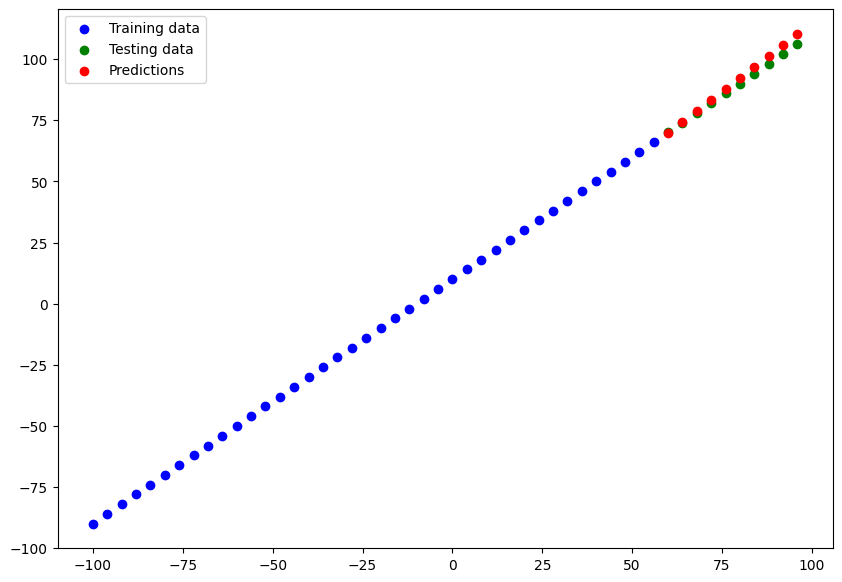

In [46]:
plot_predictions(predictions = y_preds_2)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [47]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# Fit a model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose = 0)

In [48]:
y_preds_3 = model_3.predict(X_test)
y_preds_3

1/1 [==============================] - 0s 42ms/step


array([[15.887258],
       [16.648785],
       [17.410315],
       [18.171844],
       [18.933372],
       [19.6949  ],
       [20.45643 ],
       [21.217957],
       [21.979488],
       [22.741016]], dtype=float32)

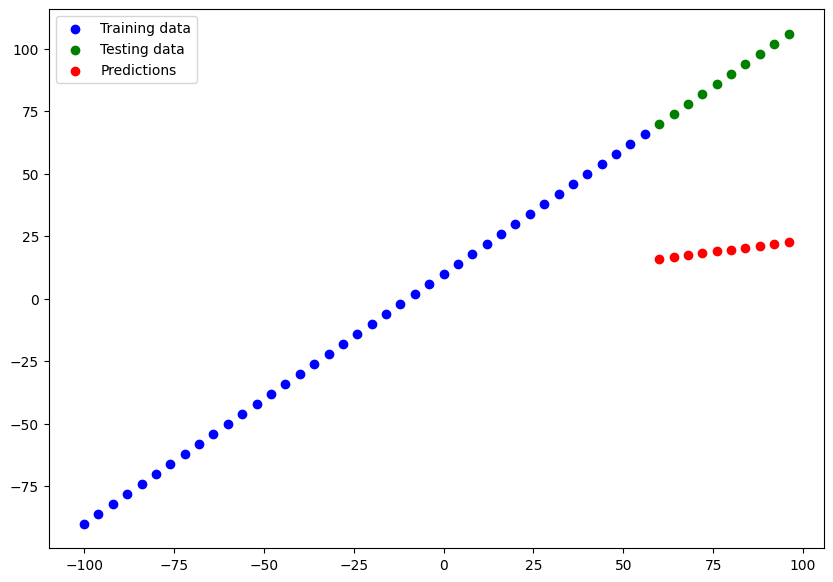

In [49]:
plot_predictions(predictions = y_preds_3)

In [50]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68587>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.2715>)

**Note:** You want to start with small experiments (small models) and make sure they work) and then increase their scale when necessary.

## Comparing the results of our experiments

WE've run a few experiments now, let's compare results

In [51]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.575134,347.144135
1,model_2,2.052071,6.181209
2,model_3,68.685867,4804.271484


Looks like model_2 performs the best

In [52]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden (Dense)              (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** one of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure our which don't work and in turn, get closer to figuring out what does work.

Remember, the machine learning practitioner's motto is: experiment, experiment, experiment

## Tracking your experiments

One really good habbit in machine learning modelling is to track the results of your experiments and in doing so it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or whatever they were trained) such as in a web application or a mobile app.

Two main formats we can save our models to:
1. The SavedModel format
2. The HDF5 format

In [53]:
# Save model using the SavedModel format
model_2.save("model_02_SavedModel/best_model_SavedModel_format_02")

In [54]:
# Save model using HDF5 format
model_2.save("model_02_HDF5/best_model_02.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
# Save model using Keras format
model_2.save("model_02_keras/best_model_02.keras", overwrite = True)

## Loading in a saved model

In [59]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("model_02_SavedModel/best_model_SavedModel_format_02")

In [60]:
# Compare model_2 predictions with loaded model predictions
model_2_preds = model_2.predict(X_test)
loaded_model_2_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_model_2_preds

1/1 [==============================] - 0s 61ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
# Load in the HDF5 model
loaded_hdf5_model = tf.keras.models.load_model("model_02_HDF5/best_model_02.h5")
loaded_hdf5_model_preds = loaded_hdf5_model.predict(X_test)
loaded_hdf5_model_preds == model_2_preds

1/1 [==============================] - 0s 62ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [62]:
# Loading in the keras model
loaded_keras_model = tf.keras.models.load_model("/content/model_02_keras/best_model_02.keras")
loaded_keras_model_preds = loaded_keras_model.predict(X_test)
loaded_keras_model_preds == model_2_preds

1/1 [==============================] - 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

1. You can go to the files tab and right click on the file you're after and click Download
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see second cell below)

In [63]:
# Download a file from Google Colab
from google.colab import files
#files.download("/content/model_02_keras/best_model_02.keras")


In [64]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/model_02_HDF5/best_model_02.h5 /content/drive/MyDrive/tensorflow_course

In [65]:
!ls /content/drive/MyDrive/tensorflow_course

best_model_02.h5


## A larger example

In [66]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
# one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


# Create X & y values (features and labels)

In [69]:
# Getting the features
X = insurance_one_hot.drop("charges", axis = 1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [70]:
# Getting ground truth
y = insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [71]:
# Training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [72]:
# Creating a model
tf.random.set_seed(42)

insurance_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)]
)

# Compiling a model
insurance_model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
insurance_model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8558.7998 - mae: 8558.7998
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7883.1030 - mae: 7883.1030
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7507.5381 - mae: 7507.5381
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7701.5337 - mae: 7701.5337
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7677.1602 - mae: 7677.1602
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7612.6777 - mae: 7612.6777
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7577.1460 - mae: 7577.1460
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7788.1294 - mae: 7788.1294
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7585.5903 - mae: 7585.5903
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7728.9663 - mae: 7728.9663

In [73]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8728.0508 - mae: 8728.0508


[8728.05078125, 8728.05078125]

Right now it looks like our model isn't performing too well. Let's try and improve it!

To try to improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Same as above but train for longer (200 epochs)

In [74]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13313.8389 - mae: 13313.8389
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13183.9971 - mae: 13183.9971
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12909.3428 - mae: 12909.3428
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12343.0527 - mae: 12343.0527
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11335.0762 - mae: 11335.0762
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9907.3867 - mae: 9907.3867
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8451.9238 - mae: 8451.9238
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7608.6050 - mae: 7608.6050
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7438.8320 - mae: 7438.8320
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7415.4106 - mae:

In [75]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4852.4922 - mae: 4852.4922


[4852.4921875, 4852.4921875]

In [76]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13275.9404 - mae: 13275.9404
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13088.9717 - mae: 13088.9717
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12713.9824 - mae: 12713.9824
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11999.8252 - mae: 11999.8252
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10833.3555 - mae: 10833.3555
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9376.6631 - mae: 9376.6631
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8081.2505 - mae: 8081.2505
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7498.9121 - mae: 7498.9121
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7410.7773 - mae: 7410.7773
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7391.2056 - mae:

In [77]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3496.1431 - mae: 3496.1431


[3496.14306640625, 3496.14306640625]

In [78]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8728.0508 - mae: 8728.0508


[8728.05078125, 8728.05078125]

Text(0.5, 0, 'epochs')

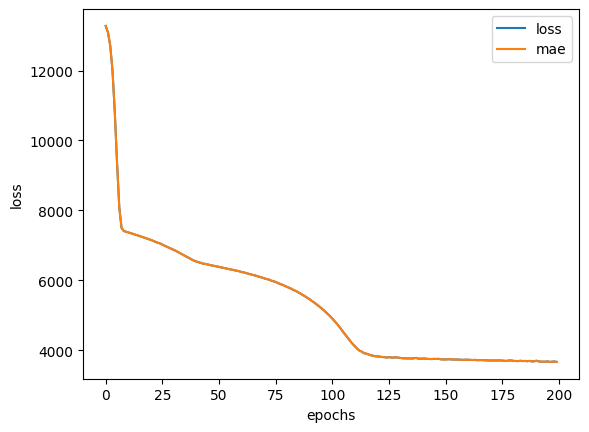

In [79]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** how long should you train for?

It depends.Really. it depends on the problem you're working on.

However, many people have asked this question before... so the TensorFlow has a solution! It is called early stopping callback, which is a TensorFlow component you can add to your model to stop training when it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values neural networks prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we could borrow a few classes from SciKit learn



In [92]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # Put all data into a range between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"] )
)

# Create X and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [93]:
 # What does data look like now
 X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [98]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [100]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one-hot encoded. Let's build a neural network and see how it works

In [131]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                        metrics = ["mae"])

history = insurance_model_4.fit(X_train_normal, y_train, epochs = 1000)

Epoch 1/1000
34/34 [==============================] - 2s 5ms/step - loss: 13345.8223 - mae: 13345.8223
Epoch 2/1000
34/34 [==============================] - 0s 4ms/step - loss: 13344.0703 - mae: 13344.0703
Epoch 3/1000
34/34 [==============================] - 0s 4ms/step - loss: 13341.8545 - mae: 13341.8545
Epoch 4/1000
34/34 [==============================] - 0s 4ms/step - loss: 13338.7656 - mae: 13338.7656
Epoch 5/1000
34/34 [==============================] - 0s 4ms/step - loss: 13334.3076 - mae: 13334.3076
Epoch 6/1000
34/34 [==============================] - 0s 4ms/step - loss: 13327.9014 - mae: 13327.9014
Epoch 7/1000
34/34 [==============================] - 0s 4ms/step - loss: 13318.8662 - mae: 13318.8662
Epoch 8/1000
34/34 [==============================] - 0s 5ms/step - loss: 13306.4141 - mae: 13306.4141
Epoch 9/1000
34/34 [==============================] - 0s 4ms/step - loss: 13289.6465 - mae: 13289.6465
Epoch 10/1000
34/34 [==============================] - 0s 4ms/step - loss

Text(0.5, 0, 'epochs')

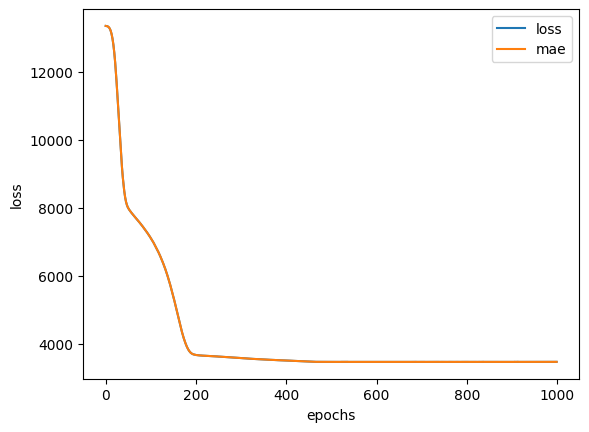

In [132]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [126]:
# Evaluate the model using normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3161.2537 - mae: 3161.2537


[3161.253662109375, 3161.253662109375]